<a href="https://colab.research.google.com/github/jidan-fikri/AWAN-App/blob/master/Awan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras import layers

pre_trained_model = Xception(input_shape = (200, 200, 3), 
                                include_top = False, 
                                weights = 'imagenet')


for layer in pre_trained_model.layers:
  layer.trainable = False

83697664/83683744 [==============================] - 1s 0us/step


In [2]:
pre_trained_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 99, 99, 32)   864         ['input_1[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 99, 99, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                           

In [3]:
last_layer = pre_trained_model.get_layer('block14_sepconv2_act')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 2048)


In [4]:
from tensorflow.keras import Model

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected dense layer
x = layers.Dense(2048, activation='relu')(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (3, activation='softmax')(x)           

# Append the dense network to the base model
model = Model(pre_trained_model.input, x) 

# Print the model summary. See your dense network connected at the end.
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 99, 99, 32)   864         ['input_1[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 99, 99, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                              

In [5]:
import tensorflow as tf
opt = tf.keras.optimizers.Adam()
# Set the training parameters
model.compile(optimizer = opt, 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])

## Prepare the dataset

In [6]:
!gdown 1f2zRPw1mDlkO_2Ze6mp8ecGu2S-LQkuO

Downloading...
From: https://drive.google.com/uc?id=1f2zRPw1mDlkO_2Ze6mp8ecGu2S-LQkuO
To: /content/cloud.zip
100% 94.9M/94.9M [00:01<00:00, 94.9MB/s]


In [7]:
import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator


with zipfile.ZipFile('cloud.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/cloud-classifier')

In [8]:
base_dir = '/content/cloud-classifier'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [9]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

val_datagen = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 32,
                                                    class_mode = 'categorical', 
                                                    target_size = (200, 200))     

validation_generator =  val_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 32,
                                                          class_mode  = 'categorical', 
                                                          target_size = (200, 200))



Found 1868 images belonging to 3 classes.
Found 232 images belonging to 3 classes.


## Train the model


In [10]:
# Train the model.
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            epochs = 100,
            verbose = 1)

Epoch 1/100
59/59 [==============================] - 36s 384ms/step - loss: 3.8743 - acc: 0.4898 - val_loss: 0.9444 - val_acc: 0.5862
Epoch 2/100
59/59 [==============================] - 20s 343ms/step - loss: 0.9500 - acc: 0.5899 - val_loss: 0.9435 - val_acc: 0.6078
Epoch 3/100
59/59 [==============================] - 20s 344ms/step - loss: 0.8376 - acc: 0.6328 - val_loss: 0.8498 - val_acc: 0.6293
Epoch 4/100
59/59 [==============================] - 20s 343ms/step - loss: 0.7798 - acc: 0.6713 - val_loss: 0.8630 - val_acc: 0.6034
Epoch 5/100
59/59 [==============================] - 20s 344ms/step - loss: 0.7825 - acc: 0.6472 - val_loss: 0.9188 - val_acc: 0.4957
Epoch 6/100
59/59 [==============================] - 20s 341ms/step - loss: 0.7134 - acc: 0.7045 - val_loss: 0.9645 - val_acc: 0.5388
Epoch 7/100
59/59 [==============================] - 21s 346ms/step - loss: 0.6900 - acc: 0.7066 - val_loss: 0.9489 - val_acc: 0.6638
Epoch 8/100
59/59 [==============================] - 20s 344ms

## Evaluate the results

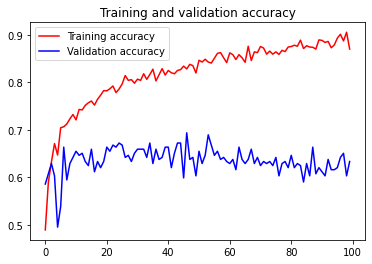

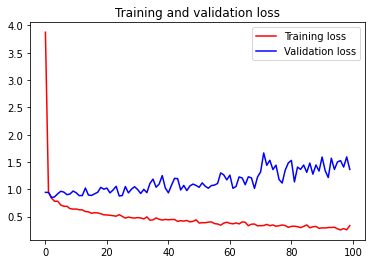

<Figure size 432x288 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

## Fine Tuning

In [12]:
for layer in pre_trained_model.layers:
  layer.trainable = True

In [13]:
opt = tf.keras.optimizers.Adam(learning_rate = 0.00001)
# Set the training parameters
model.compile(optimizer = opt, 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])

In [14]:
# Train the model.
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            epochs = 100,
            verbose = 1)

Epoch 1/100
59/59 [==============================] - 42s 600ms/step - loss: 2.2977 - acc: 0.5878 - val_loss: 1.3490 - val_acc: 0.6250
Epoch 2/100
59/59 [==============================] - 34s 569ms/step - loss: 1.5178 - acc: 0.6322 - val_loss: 1.3658 - val_acc: 0.6552
Epoch 3/100
59/59 [==============================] - 34s 564ms/step - loss: 1.1018 - acc: 0.6601 - val_loss: 1.3272 - val_acc: 0.6681
Epoch 4/100
59/59 [==============================] - 34s 563ms/step - loss: 0.8559 - acc: 0.6847 - val_loss: 1.1477 - val_acc: 0.6552
Epoch 5/100
59/59 [==============================] - 34s 565ms/step - loss: 0.7664 - acc: 0.6718 - val_loss: 0.9897 - val_acc: 0.6681
Epoch 6/100
59/59 [==============================] - 33s 562ms/step - loss: 0.7186 - acc: 0.7002 - val_loss: 0.8990 - val_acc: 0.6853
Epoch 7/100
59/59 [==============================] - 34s 566ms/step - loss: 0.6811 - acc: 0.7206 - val_loss: 0.8611 - val_acc: 0.6853
Epoch 8/100
59/59 [==============================] - 33s 560ms

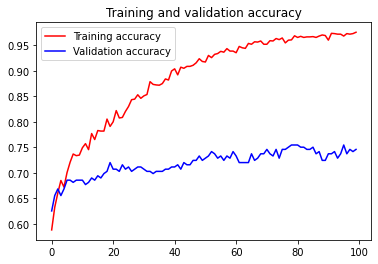

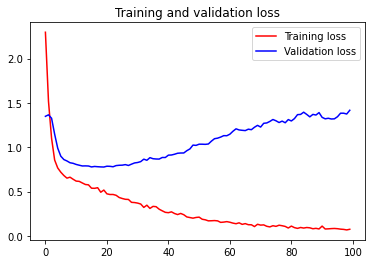

<Figure size 432x288 with 0 Axes>

In [15]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

## Test the model with the test set

In [39]:
test_dir = os.path.join(base_dir, 'test')

test_datagen = ImageDataGenerator( rescale = 1.0/255.)

test_generator =  test_datagen.flow_from_directory( test_dir,
                                                    batch_size  = 32,
                                                    class_mode  = 'categorical', 
                                                    target_size = (200, 200),
                                                    shuffle = False)

test_loss, test_acc = model.evaluate(test_generator, verbose=1)
print(test_acc)

Found 236 images belonging to 3 classes.
8/8 [==============================] - 1s 104ms/step - loss: 0.9643 - acc: 0.8051
0.805084764957428


## Plot the confusion matrix to evaluate the test model result

Classification Report
                    precision    recall  f1-score   support

        Heavy_Rain       0.84      0.63      0.72        43
Low_Chance_of_Rain       0.80      0.82      0.81        92
       Medium_Rain       0.80      0.87      0.83       101

          accuracy                           0.81       236
         macro avg       0.81      0.77      0.79       236
      weighted avg       0.81      0.81      0.80       236

Confusion matrix, without normalization
[[27  9  7]
 [ 2 75 15]
 [ 3 10 88]]


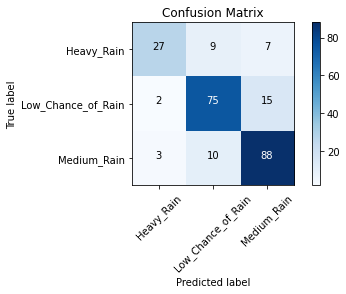

In [49]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(test_generator.classes, y_pred)
print('Classification Report')
target_names = ['Low_Chance_of_Rain', 'Medium_Rain', 'Heavy_Rain']
target_names.sort()
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

cm = confusion_matrix(test_generator.classes, y_pred)


def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm_plot_labels = target_names
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

## Save the Model and Convert it to TFLite

In [ ]:
CLOUD_SAVED_MODEL = "cloud_saved_model"

In [ ]:
tf.saved_model.save(model, CLOUD_SAVED_MODEL)

In [ ]:
%%bash -s $CLOUD_SAVED_MODEL
saved_model_cli show --dir $1 --tag_set serve --signature_def serving_default

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(CLOUD_SAVED_MODEL)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

In [ ]:
tflite_model_file = 'converted_model.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

In [ ]:
!zip -r /content/saved_model.zip /content/cloud_saved_model

In [ ]:
from google.colab import files
files.download("/content/saved_model.zip")

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)